11493376/11490434 [==============================] - 0s 0us/step


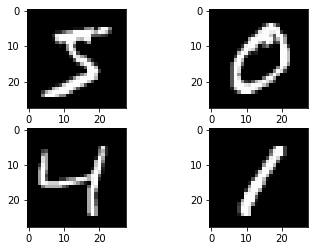

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [8]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2812 - accuracy: 0.9202 - val_loss: 0.1393 - val_accuracy: 0.9606
Epoch 2/10
300/300 - 4s - loss: 0.1105 - accuracy: 0.9671 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 3/10
300/300 - 4s - loss: 0.0705 - accuracy: 0.9802 - val_loss: 0.0845 - val_accuracy: 0.9719
Epoch 4/10
300/300 - 4s - loss: 0.0499 - accuracy: 0.9859 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 5/10
300/300 - 4s - loss: 0.0358 - accuracy: 0.9898 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 6/10
300/300 - 4s - loss: 0.0268 - accuracy: 0.9925 - val_loss: 0.0618 - val_accuracy: 0.9811
Epoch 7/10
300/300 - 4s - loss: 0.0190 - accuracy: 0.9955 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 8/10
300/300 - 4s - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 9/10
300/300 - 4s - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.0638 - val_accuracy: 0.9812
Epoch 10/10
300/300 - 4s - loss: 0.0071 - accuracy: 0.9990 - val_loss: 0.0639 - val_accuracy: 0.9814